# Main Document

## EDA

TIME BASED TRENDS...


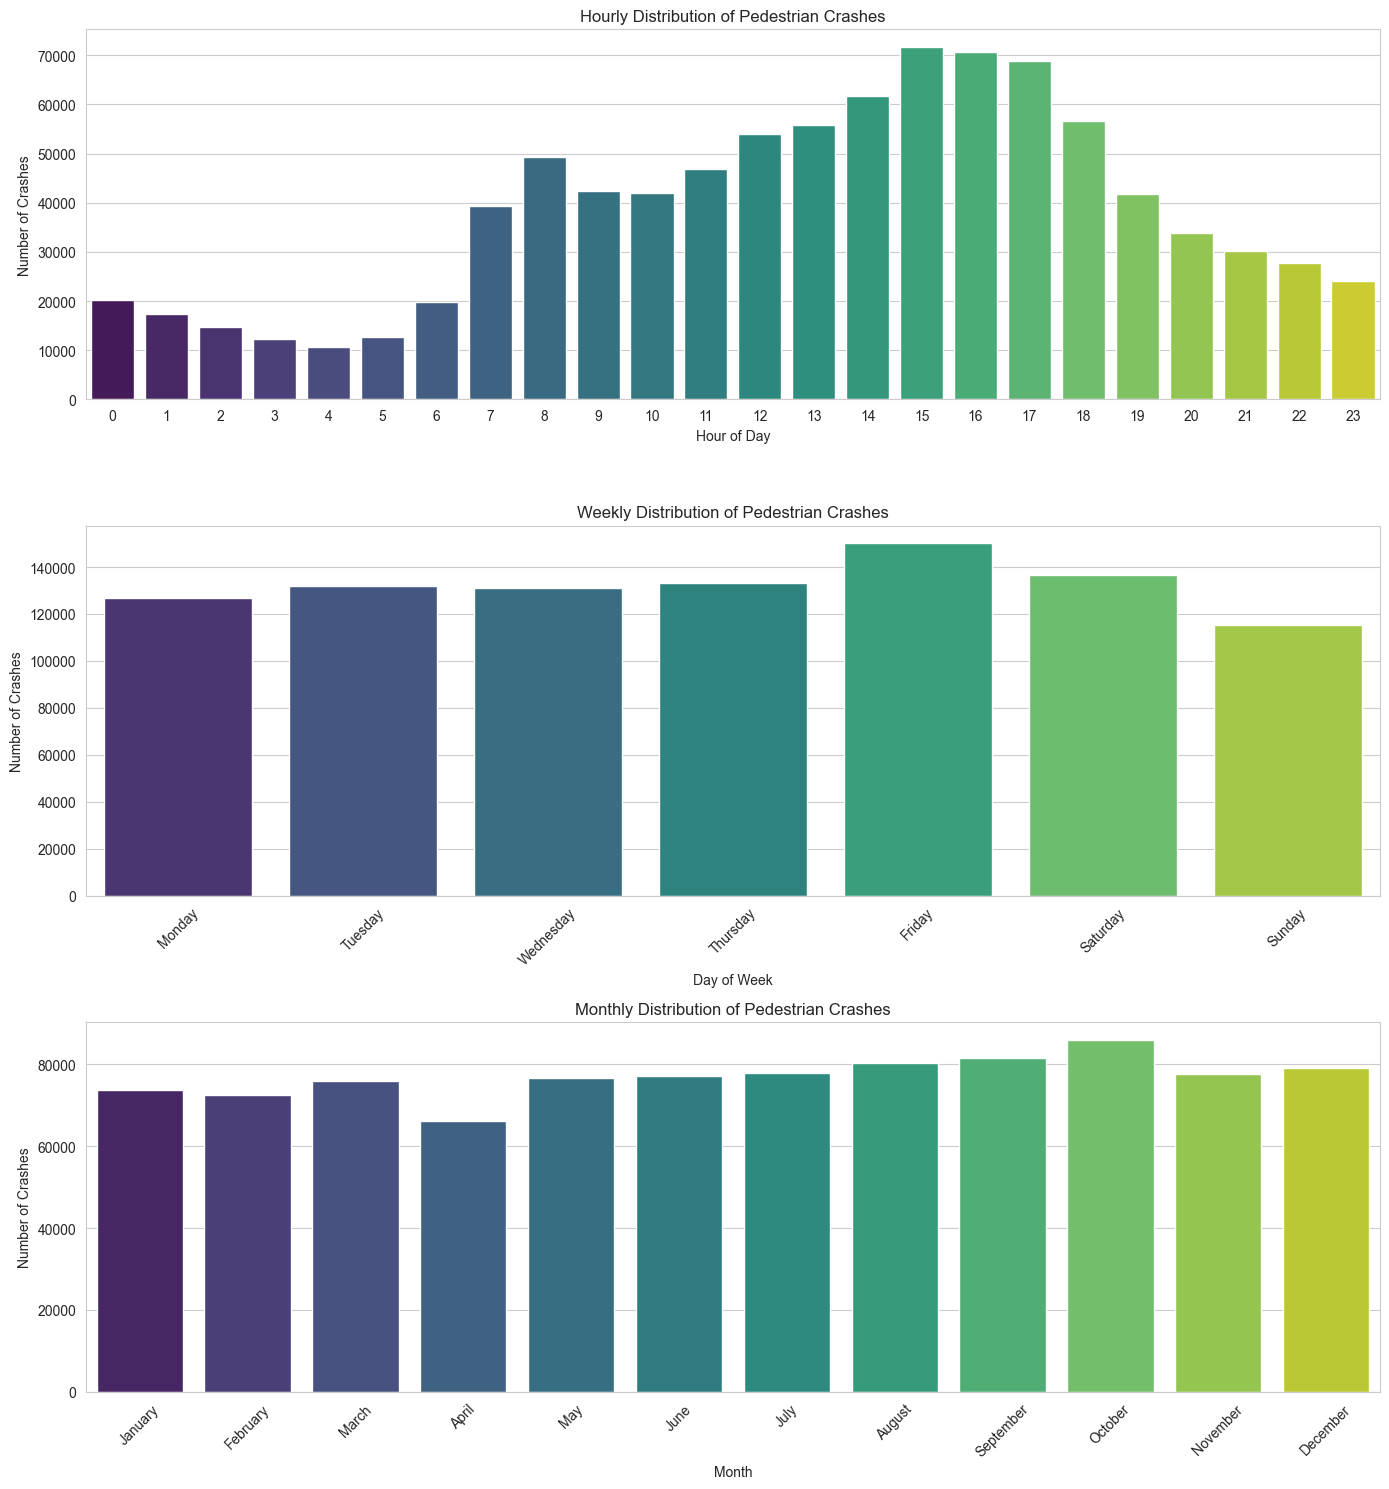


SPEED-RELATED FACTORS...


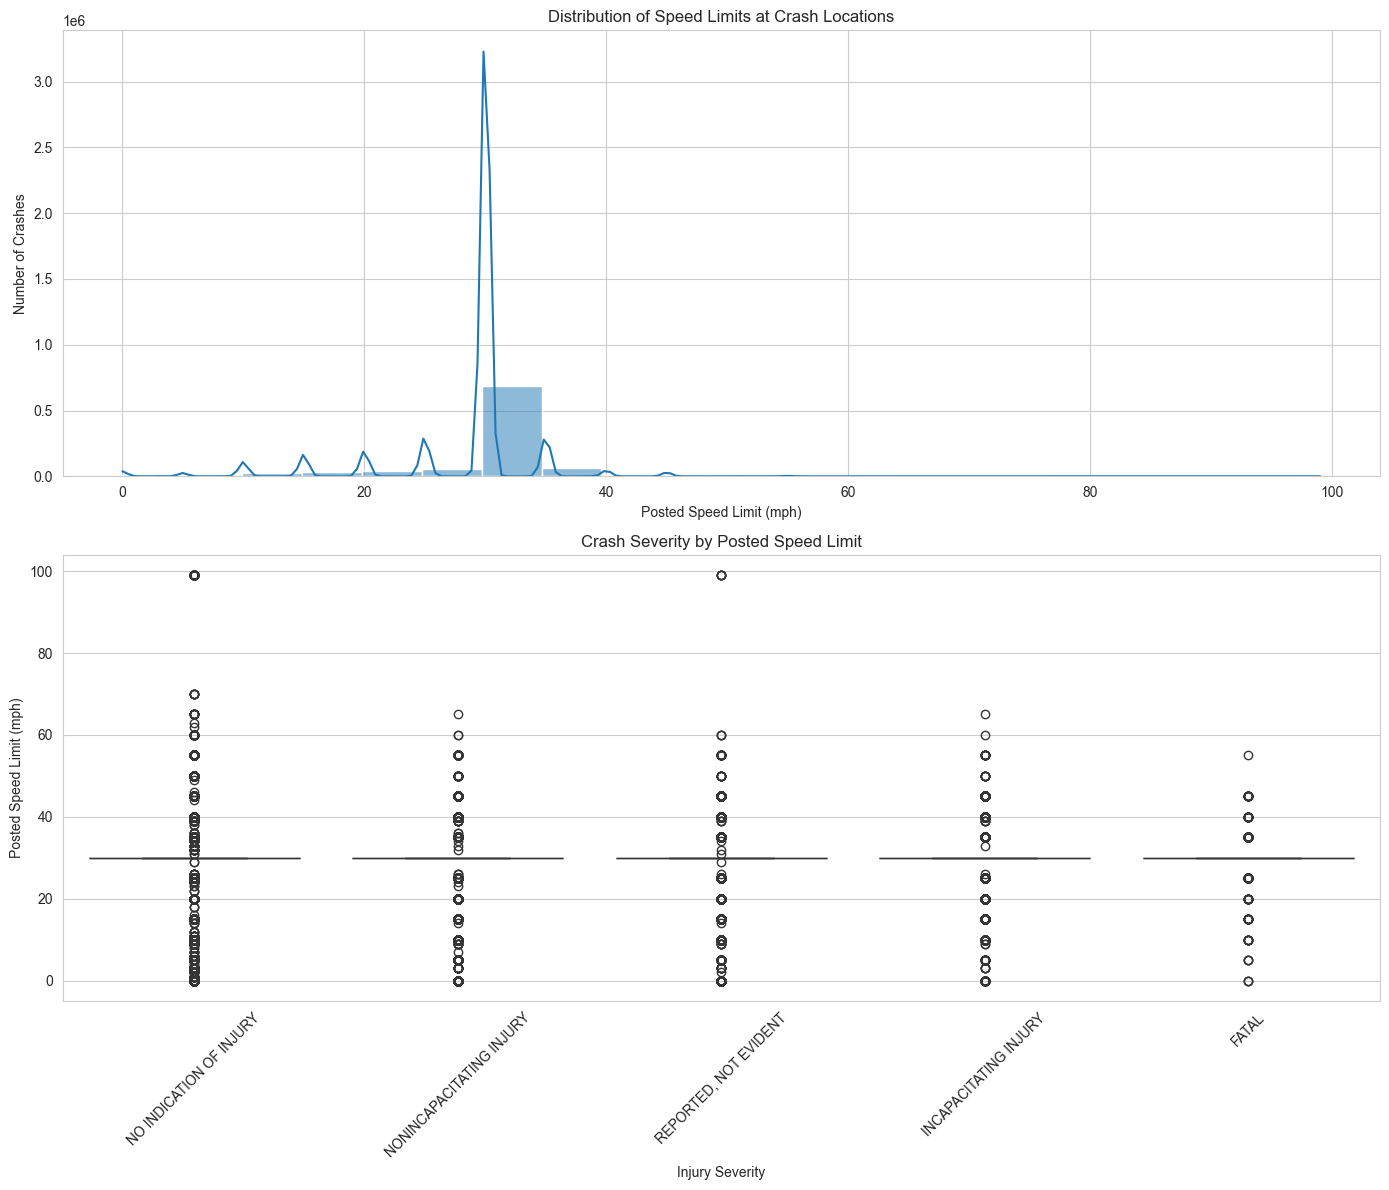


ENVIRONMENTAL FACTORS...


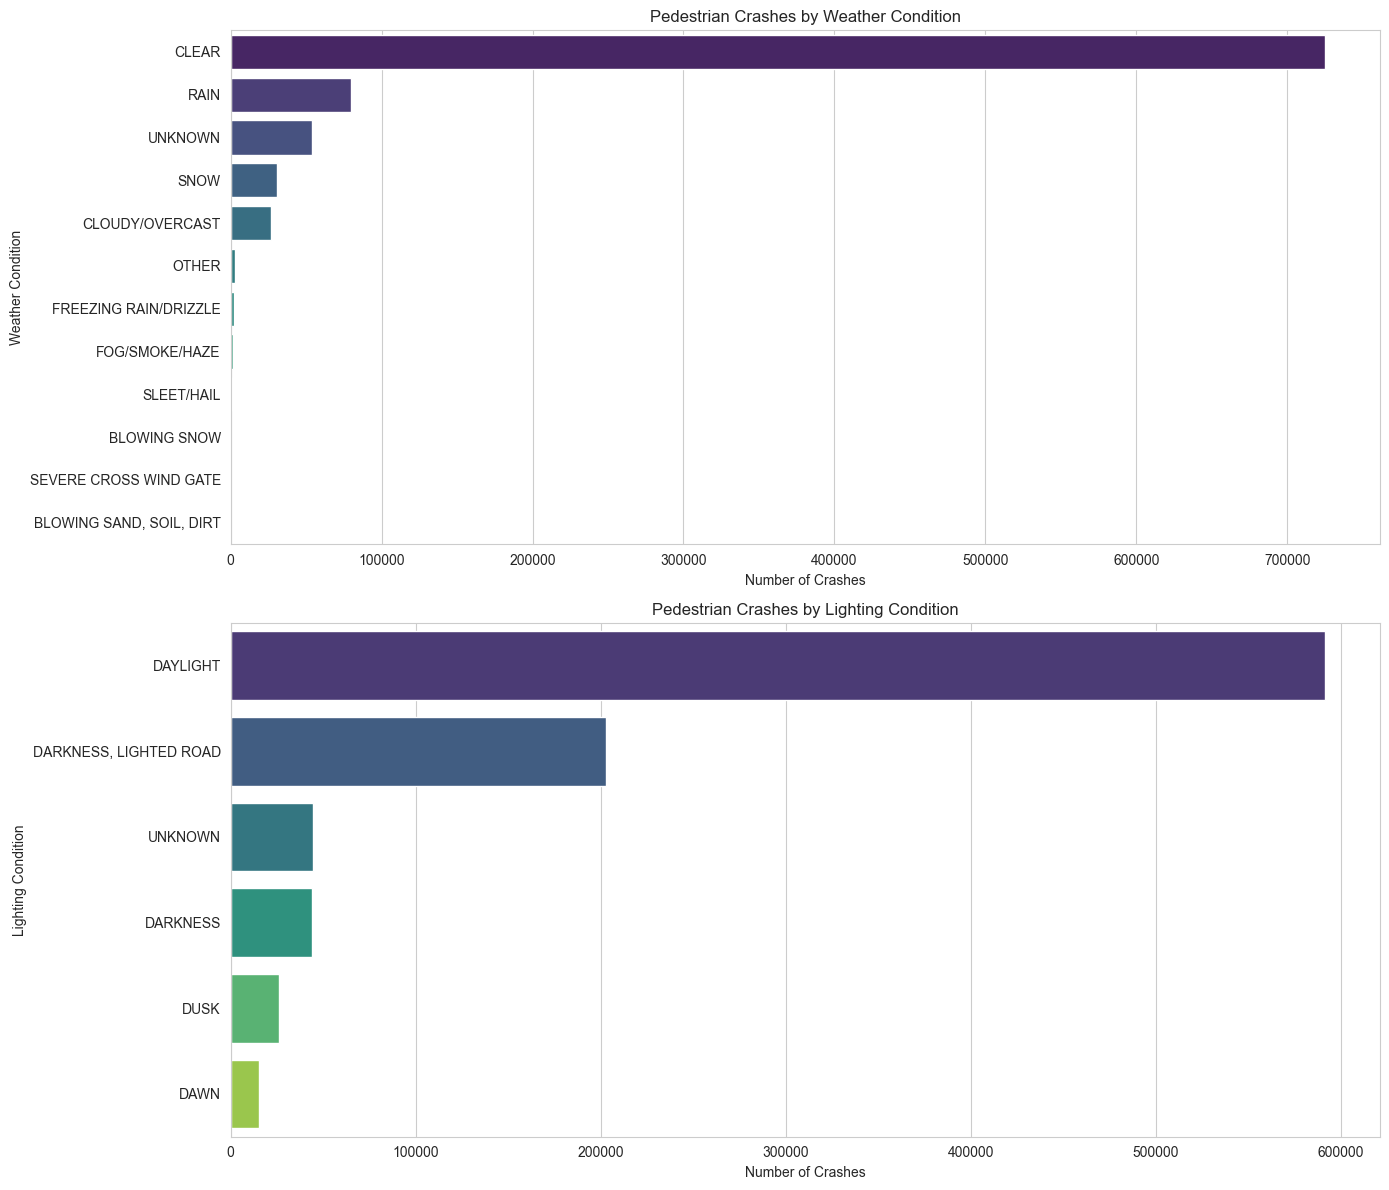


CAMERA VILATIONS...


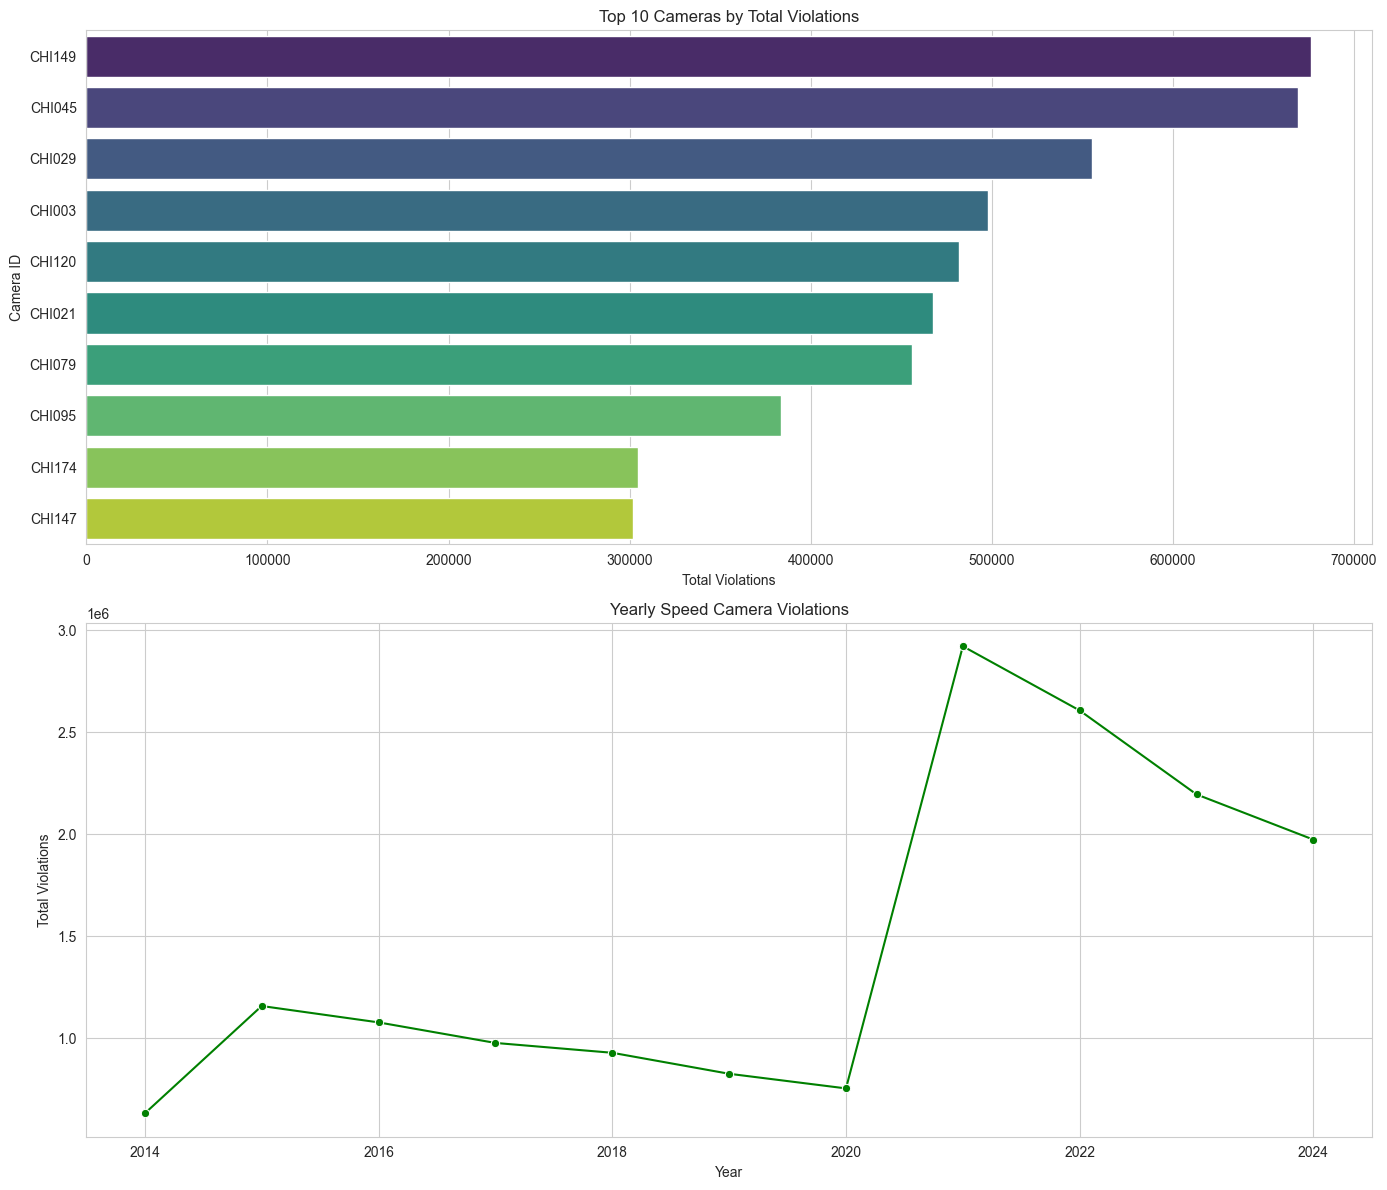

Crash Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 924583 entries, 0 to 931445
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                924583 non-null  object        
 1   CRASH_DATE_EST_I               68036 non-null   object        
 2   CRASH_DATE                     924583 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             924583 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         924583 non-null  object        
 5   DEVICE_CONDITION               924583 non-null  object        
 6   WEATHER_CONDITION              924583 non-null  object        
 7   LIGHTING_CONDITION             924583 non-null  object        
 8   FIRST_CRASH_TYPE               924583 non-null  object        
 9   TRAFFICWAY_TYPE                924583 non-null  object        
 10  LANE_CNT                       198123 non-null  floa

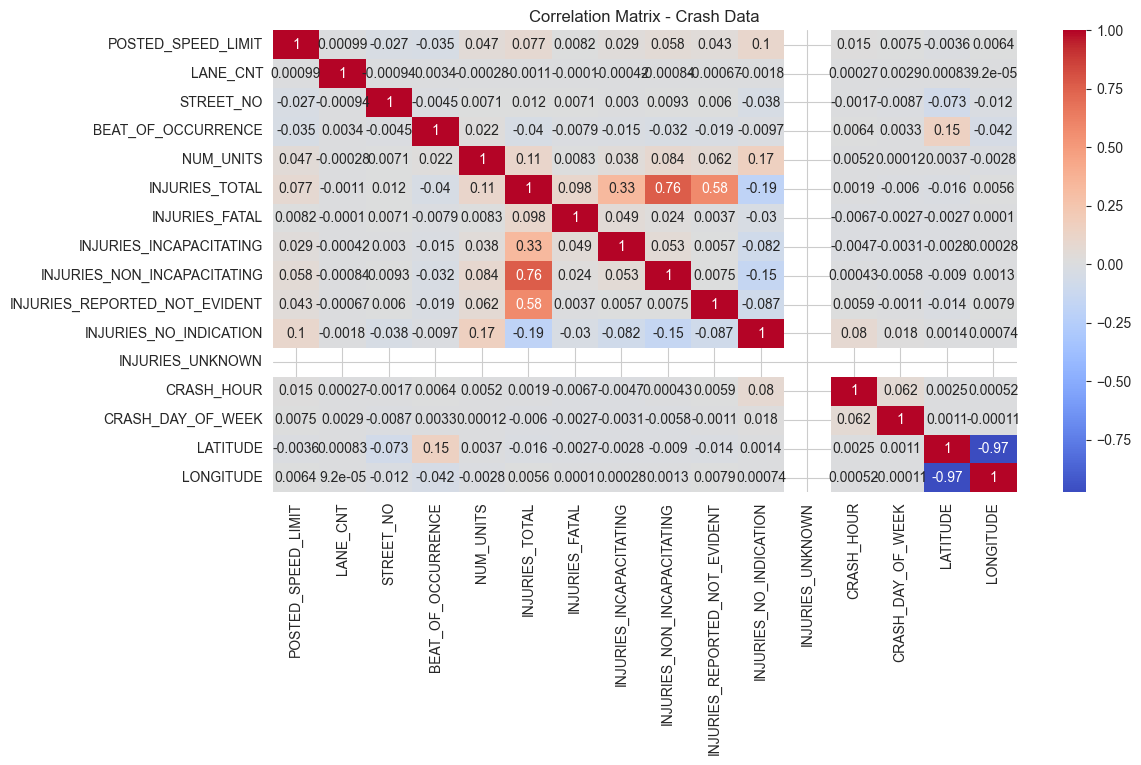

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def load_data():
    # Load crashes data with proper datetime parsing
    crashes = pd.read_csv("traffic_crashes.csv")
    crashes.columns = crashes.columns.str.strip()
    crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    
    # Load speed camera data
    cameras = pd.read_csv("speed_camera_violations.csv", parse_dates=['VIOLATION DATE'])
    cameras.columns = cameras.columns.str.strip()
    
    # Load traffic data
    traffic = pd.read_csv("chicago_traffic_tracker.csv", parse_dates=[' LAST_UPDATED'])
    traffic.columns = traffic.columns.str.strip()
    
    return crashes, cameras, traffic

def clean_data(crashes, cameras, traffic):
    # Clean crashes data
    crashes = crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])
    crashes['POSTED_SPEED_LIMIT'] = pd.to_numeric(crashes['POSTED_SPEED_LIMIT'], errors='coerce')
    
    # Clean camera data
    cameras = cameras.dropna(subset=['LATITUDE', 'LONGITUDE'])
    cameras['VIOLATIONS'] = pd.to_numeric(cameras['VIOLATIONS'], errors='coerce')
    
    # Clean traffic data
    traffic = traffic[traffic['CURRENT_SPEED'] > 0]  # Remove invalid speed records
    
    return crashes, cameras, traffic

def plot_time_trends(crashes):
    """Plot time-based patterns in crash data"""
    fig, axes = plt.subplots(3, 1, figsize=(14, 15))
    
    # Hourly distribution
    crashes['CRASH_HOUR'] = crashes['CRASH_DATE'].dt.hour
    sns.countplot(data=crashes, x='CRASH_HOUR', ax=axes[0], palette='viridis')
    axes[0].set_title('Hourly Distribution of Pedestrian Crashes')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Number of Crashes')
    
    # Daily distribution
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    crashes['CRASH_DAY'] = crashes['CRASH_DATE'].dt.day_name()
    sns.countplot(data=crashes, x='CRASH_DAY', order=day_order, ax=axes[1], palette='viridis')
    axes[1].set_title('Weekly Distribution of Pedestrian Crashes')
    axes[1].set_xlabel('Day of Week')
    axes[1].set_ylabel('Number of Crashes')
    axes[1].tick_params(axis='x', rotation=45)
    
    # Monthly distribution
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    crashes['CRASH_MONTH'] = crashes['CRASH_DATE'].dt.month_name()
    sns.countplot(data=crashes, x='CRASH_MONTH', order=month_order, ax=axes[2], palette='viridis')
    axes[2].set_title('Monthly Distribution of Pedestrian Crashes')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Number of Crashes')
    axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_speed_analysis(crashes):
    """Analyze relationship between speed and crash severity"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Speed limit distribution at crash sites
    sns.histplot(data=crashes, x='POSTED_SPEED_LIMIT', bins=20, ax=axes[0], kde=True)
    axes[0].set_title('Distribution of Speed Limits at Crash Locations')
    axes[0].set_xlabel('Posted Speed Limit (mph)')
    axes[0].set_ylabel('Number of Crashes')
    
    # Speed vs. injury severity
    severity_order = crashes['MOST_SEVERE_INJURY'].value_counts().index
    sns.boxplot(data=crashes, x='MOST_SEVERE_INJURY', y='POSTED_SPEED_LIMIT', 
                order=severity_order, ax=axes[1], palette='viridis')
    axes[1].set_title('Crash Severity by Posted Speed Limit')
    axes[1].set_xlabel('Injury Severity')
    axes[1].set_ylabel('Posted Speed Limit (mph)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_environmental_factors(crashes):
    """Analyze environmental conditions during crashes"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Weather conditions
    weather_order = crashes['WEATHER_CONDITION'].value_counts().index
    sns.countplot(data=crashes, y='WEATHER_CONDITION', order=weather_order, ax=axes[0], palette='viridis')
    axes[0].set_title('Pedestrian Crashes by Weather Condition')
    axes[0].set_xlabel('Number of Crashes')
    axes[0].set_ylabel('Weather Condition')
    
    # Lighting conditions
    light_order = crashes['LIGHTING_CONDITION'].value_counts().index
    sns.countplot(data=crashes, y='LIGHTING_CONDITION', order=light_order, ax=axes[1], palette='viridis')
    axes[1].set_title('Pedestrian Crashes by Lighting Condition')
    axes[1].set_xlabel('Number of Crashes')
    axes[1].set_ylabel('Lighting Condition')
    
    plt.tight_layout()
    plt.show()

def plot_camera_violations(cameras):
    """Analyze speed camera violation patterns"""
    if len(cameras) == 0:
        print("No camera data available")
        return
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Violations by camera
    top_cameras = cameras.groupby('CAMERA ID')['VIOLATIONS'].sum().nlargest(10)
    sns.barplot(x=top_cameras.values, y=top_cameras.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Cameras by Total Violations')
    axes[0].set_xlabel('Total Violations')
    axes[0].set_ylabel('Camera ID')
    
    # Violation trends over time
    if 'VIOLATION DATE' in cameras.columns:
        cameras['YEAR'] = cameras['VIOLATION DATE'].dt.year
        yearly_violations = cameras.groupby('YEAR')['VIOLATIONS'].sum()
        sns.lineplot(x=yearly_violations.index, y=yearly_violations.values, 
                     ax=axes[1], marker='o', color='green')
        axes[1].set_title('Yearly Speed Camera Violations')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Violations')
    
    plt.tight_layout()
    plt.show()


crashes, cameras, traffic = load_data()
crashes, cameras, traffic = clean_data(crashes, cameras, traffic)

print("TIME BASED TRENDS...")
plot_time_trends(crashes)

print("\nSPEED-RELATED FACTORS...")
plot_speed_analysis(crashes)

print("\nENVIRONMENTAL FACTORS...")
plot_environmental_factors(crashes)

print("\nCAMERA VILATIONS...")
plot_camera_violations(cameras)

# crash data
print("Crash Data Overview:")
print(crashes.info())
print("\nCrash Data Description (Numerical Features):")
print(crashes.describe())

print("\nMost common injury types:")
print(crashes['MOST_SEVERE_INJURY'].value_counts())

print("\nTop 10 crash causes:")
print(crashes['FIRST_CRASH_TYPE'].value_counts().head(10))

print("\nWeather conditions during crashes:")
print(crashes['WEATHER_CONDITION'].value_counts())

print("\nLighting conditions during crashes:")
print(crashes['LIGHTING_CONDITION'].value_counts())

# camera data
print("Camera Data Overview:")
print(cameras.info())
print("\nCamera Data Description (Numerical Features):")
print(cameras.describe())

print("\nTop 10 camera IDs by total violations:")
print(cameras.groupby("CAMERA ID")['VIOLATIONS'].sum().sort_values(ascending=False).head(10))

print("\nNumber of unique camera locations:")
print(cameras['ADDRESS'].nunique())

print("\nViolation dates range:")
print(f"{cameras['VIOLATION DATE'].min()} to {cameras['VIOLATION DATE'].max()}")

# traffic data
print("Traffic Data Overview:")
print(traffic.info())
print("\nTraffic Data Description:")
print(traffic.describe())

print("\nAverage current speed:")
print(f"Avg CURRENT_SPEED: {traffic['CURRENT_SPEED'].mean():.2f} mph")

print("\nCongestion Levels:")
if 'CONGESTION_LEVEL' in traffic.columns:
    print(traffic['CONGESTION_LEVEL'].value_counts())

# correlation of data
sns.heatmap(crashes.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Crash Data")
plt.show()

## Visuals 

### VISUAL #<X> - Camera Violations Trend - Javid Uddin
**Hypothesis**
The surge in speed camera violations from 2020 to 2021 resulted in a decrease in pedestrian-related and overall traffic crashes.

**Motivation for hypothesis**
It's fascinating to see trends in data, and how they result in direct (or indirect) relationships. In this case, it's interesting to see what caused the drastic increase in speed camera violations, especially on certain roads. Covid-19? More drivers on the roads? Additional lanes added to roads? Sneaky camera placements? We also see a drop-off in the timeline (2021-2024), thus we would like to know how that has affected traffic incidents, especially ones related to pedestrians.

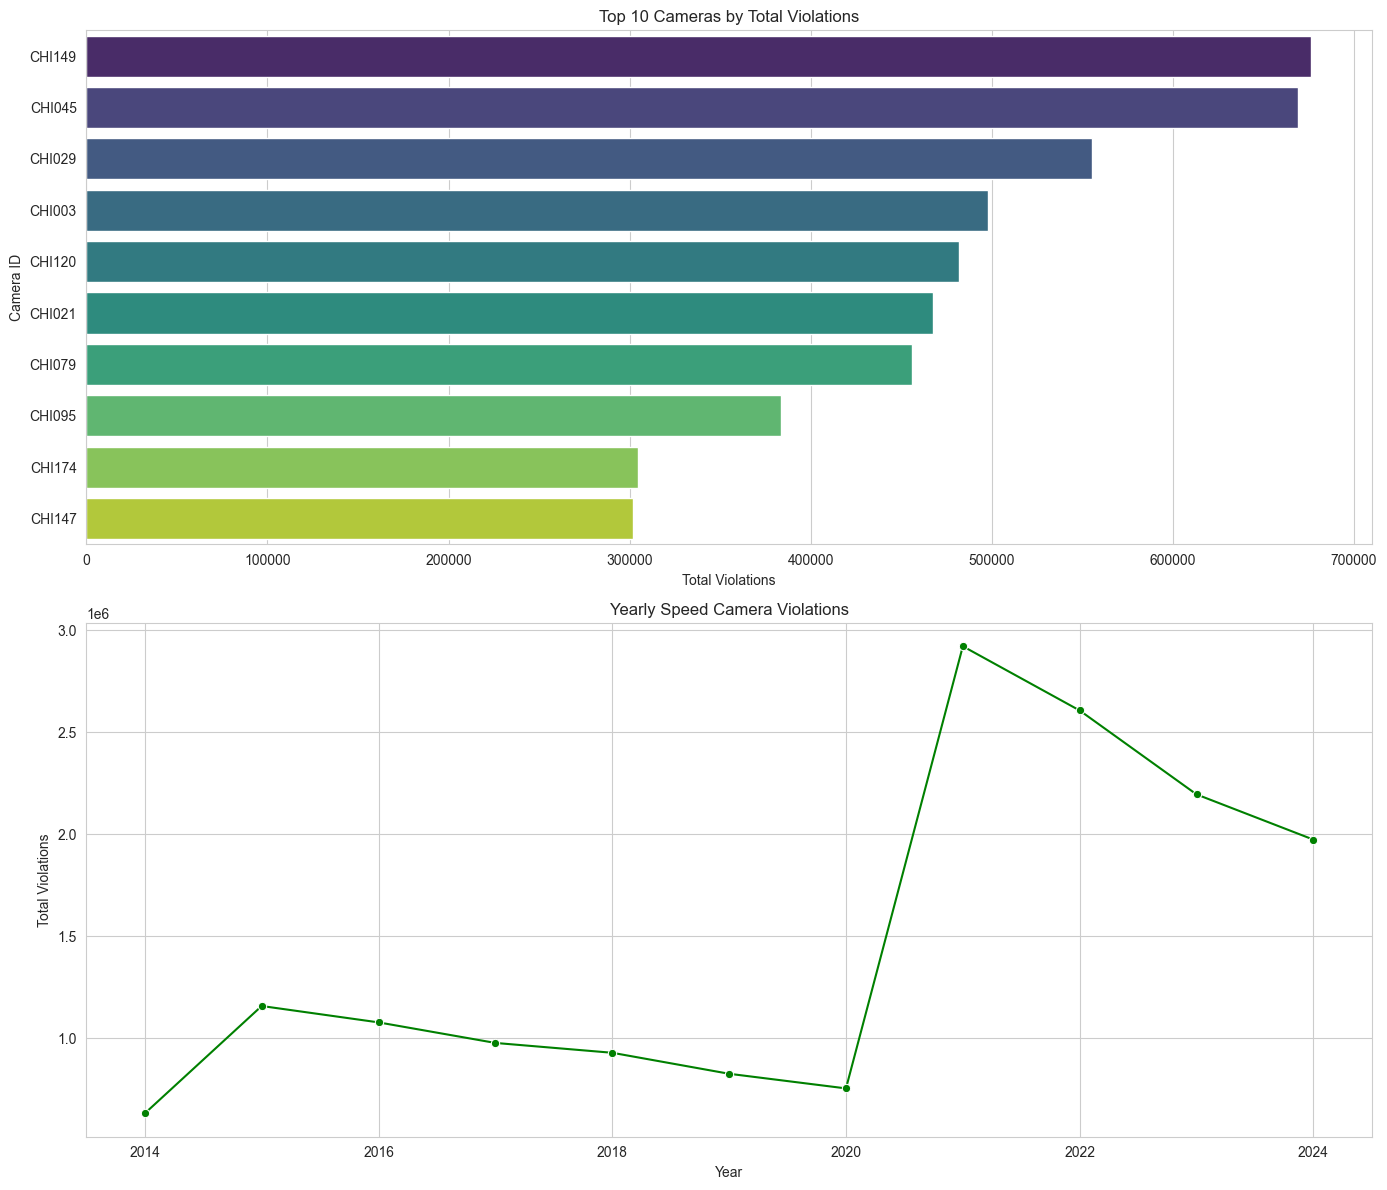

In [5]:
# Set up visualization
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def plot_camera_violations(cameras):
    """Analyze speed camera violation patterns"""
    if len(cameras) == 0:
        print("No camera data available")
        return
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # Violations by speed camera
    top_cameras = cameras.groupby('CAMERA ID')['VIOLATIONS'].sum().nlargest(10)
    sns.barplot(x=top_cameras.values, y=top_cameras.index, ax=axes[0], palette='viridis')
    axes[0].set_title('Top 10 Cameras by Total Violations')
    axes[0].set_xlabel('Total Violations')
    axes[0].set_ylabel('Camera ID')
    
    # Violation trends over time
    if 'VIOLATION DATE' in cameras.columns:
        cameras['YEAR'] = cameras['VIOLATION DATE'].dt.year
        yearly_violations = cameras.groupby('YEAR')['VIOLATIONS'].sum()
        sns.lineplot(x=yearly_violations.index, y=yearly_violations.values, 
                     ax=axes[1], marker='o', color='green')
        axes[1].set_title('Yearly Speed Camera Violations')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Total Violations')
    
    plt.tight_layout()
    plt.show()

plot_camera_violations(cameras)

## ML 

## Reflection